# Data Preprocessing

## 1. Missing data

In [1]:
import pandas as pd
import numpy as np
from __future__ import division
from io import StringIO

#### Create a toy dataset

In [2]:
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
0.0,11.0,12.0,'''
csv_data = unicode(csv_data)
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [3]:
df.isnull().sum(axis=0)

A    0
B    0
C    1
D    1
dtype: int64

#### Eliminating samples or features

In [4]:
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [5]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,0.0,11.0


In [6]:
print df.dropna(how='all') # only drop rows where all columns are NaN
print df.dropna(thresh=4) # drop values that have  not at least 4 non-NaN values
print df.dropna(subset=['C']) # only drop rows where NaN appear in  specific columns 

     A     B     C    D
0  1.0   2.0   3.0  4.0
1  5.0   6.0   NaN  8.0
2  0.0  11.0  12.0  NaN
     A    B    C    D
0  1.0  2.0  3.0  4.0
     A     B     C    D
0  1.0   2.0   3.0  4.0
2  0.0  11.0  12.0  NaN


#### Imputting missing values (Interpolation)

In [7]:
# mean imputation
from sklearn.preprocessing import Imputer

In [8]:
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [  0. ,  11. ,  12. ,   6. ]])

## 2. Handling Categorical Data

In [9]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


#### Mapping ordinal features

In [10]:
size_mapping = {
    'XL' : 3,
    'L' : 2,
    'M' :1
}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [11]:
# inv_size_mapping = { v: k  for k, v in size_mapping.items() }

# df['size'] = df['size'].map(inv_size_mapping)

#### Encoding class labels

In [12]:
class_mapping = {label:idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [13]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [14]:
inv_class_mapping = {idx:label for label,idx in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [15]:
#sklearn encoder
from sklearn.preprocessing import LabelEncoder

In [16]:
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

In [17]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

#### One-hot Encoding for Nominal Features

In [18]:
# wrong way to encode nominal variables
X = df[['color','size','price']].values
color_le = LabelEncoder()
print X
X[:,0] = color_le.fit_transform(X[:,0])
X

[['green' 1 10.1]
 ['red' 2 13.5]
 ['blue' 3 15.3]]


array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()
# directly create dense matrix
# ohe = OneHotEncoder(categorical_features=[0],sparse=False)
# ohe.fit_transform(X)

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [21]:
# pandas version
pd.get_dummies(df[['price','color','size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0.0,1.0,0.0
1,13.5,2,0.0,0.0,1.0
2,15.3,3,1.0,0.0,0.0


## 3. Partitioning a Dataset

In [22]:
df_wine = pd.read_csv('../code/datasets/wine/wine.data',
                      header=None)

In [23]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

('Class labels', array([1, 2, 3]))


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [24]:
from sklearn.cross_validation import train_test_split

In [25]:
X, y = df_wine.iloc[:, 1:].values,  df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Feature Scaling

#### Normalization

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
X_train_norm[:10,0]

array([ 0.72043011,  0.31989247,  0.60215054,  0.57258065,  0.76075269,
        0.48924731,  0.75537634,  0.61021505,  0.54301075,  0.39784946])

#### Standartizaion

In [28]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
X_train_std[:10,0]

array([ 0.91083058, -0.95609928,  0.35952243,  0.22169539,  1.09877654,
       -0.16672625,  1.07371707,  0.39711162,  0.08386836, -0.59273709])

## 5. Selecting Meaningful Features

#### Sparse solutions with L1 Regularization

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print 'Test accuracy:',lr.score(X_test_std, y_test)

Test accuracy: 0.981481481481


In [31]:
# OvA algorithm creates 3 diff intercepts
lr.intercept_

array([-0.38384478, -0.15806885, -0.70037043])

In [32]:
print lr.coef_.shape
lr.coef_
# note that the weight vectors are sparce means they only have few nonzero elements

(3, 13)


array([[ 0.2802378 ,  0.        ,  0.        , -0.02807586,  0.        ,
         0.        ,  0.71003825,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23627324],
       [-0.64402485, -0.06880004, -0.0572104 ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92677596,
         0.06014083,  0.        , -0.37107082],
       [ 0.        ,  0.06138885,  0.        ,  0.        ,  0.        ,
         0.        , -0.63736078,  0.        ,  0.        ,  0.49866079,
        -0.35797559, -0.57005602,  0.        ]])

#### Sequential Features Selection Algorithms

In [33]:
from sklearn.base import clone
from itertools import combinations
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

In [34]:
class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

#     def transform(self, X):
#         return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

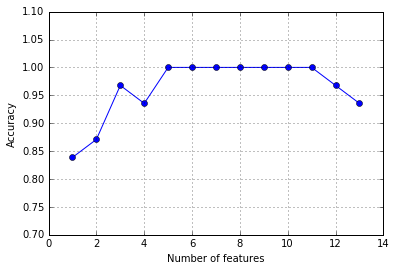

In [35]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o' )
plt.ylim([0.7,1.1])
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [36]:
# best 5 features
k5 = list(sbs.subsets_[8])
print df_wine.columns[1:][k5]

Index([u'Alcohol', u'Malic acid', u'Alcalinity of ash', u'Hue', u'Proline'], dtype='object')


In [37]:
# complete feature set
knn.fit(X_train_std, y_train)
print 'Training accuracy:',knn.score(X_train_std,y_train)
print 'Test accuracy:', knn.score(X_test_std,y_test)

Training accuracy: 0.983870967742
Test accuracy: 0.944444444444


In [38]:
# Using fewer features
knn.fit(X_train_std[:,k5],y_train)
print 'Training accuracy:',knn.score(X_train_std[:,k5],y_train)
print 'Test accuracy:',knn.score(X_test_std[:,k5],y_test)

Training accuracy: 0.959677419355
Test accuracy: 0.962962962963


http://scikit-learn.org/stable/modules/feature_selection.html.


## 6. Assessing feature importance with random forests


In [39]:
from sklearn.ensemble import RandomForestClassifier 

In [40]:
feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

In [49]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Color intensity                0.182483
 2) Proline                        0.158610
 3) Flavanoids                     0.150948
 4) OD280/OD315 of diluted wines   0.131987
 5) Alcohol                        0.106589
 6) Hue                            0.078243
 7) Total phenols                  0.060718
 8) Alcalinity of ash              0.032033
 9) Malic acid                     0.025400
10) Proanthocyanins                0.022351
11) Magnesium                      0.022078
12) Nonflavanoid phenols           0.014645
13) Ash                            0.013916


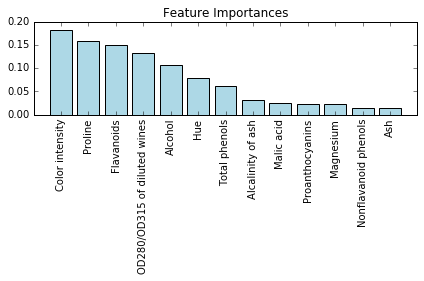

In [58]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

#### Reduce the dataset

In [61]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
sfm = SelectFromModel(forest, threshold=0.15, prefit=True)
X_selected = sfm.transform(X_train)

In [69]:
X_selected.shape

(124, 3)